**Дипломная работа по курсу «Python для анализа данных»**

1. Загрузить файл hr.csv (можно найти во вложении к заданию)
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать несколько взаимосвязей между переменными
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6. Рассчитать сколько работников работает в каждом департаменте
7. Показать распределение сотрудников по зарплатам
8. Показать распределение сотрудников по зарплатам совместно с департаментами
9. Сколько сотрудников покинули компанию
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

In [32]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# среднее
data.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [6]:
# медиана
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [13]:
# мода
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Почти для всех показателей существет только одна мода, кроме показателя average_montly_hours - среднеемесячное количество часов - там 2 моды: 135 и 156

In [14]:
# минимум
data.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [15]:
# максимум
data.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [36]:
# Стандартное отклонение
data.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

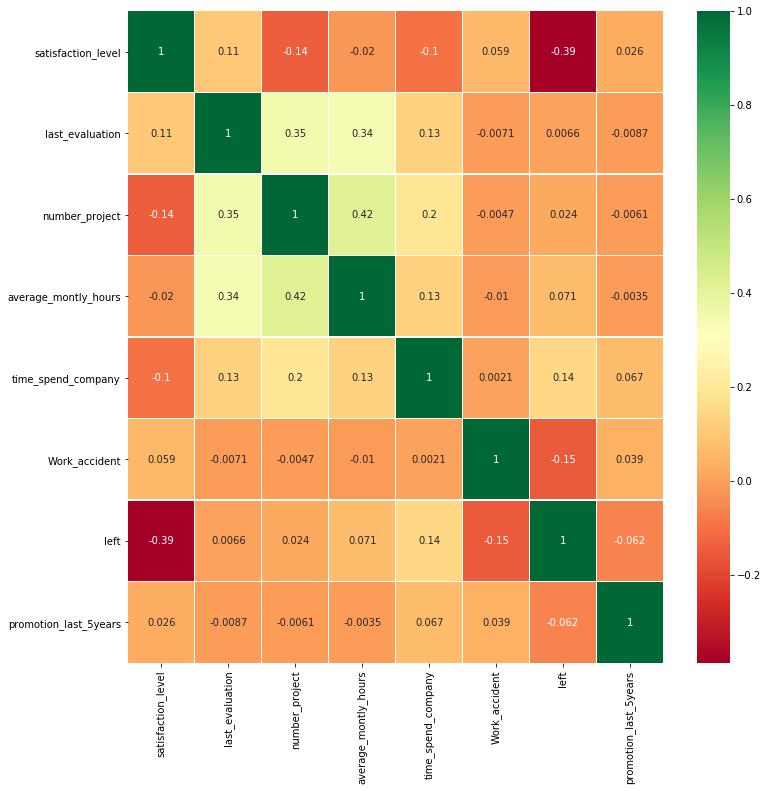

In [37]:
# Матрица корреляций
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Визуализируем взаимосвязь времени, проведённого в компании time_spend_company, номера проекта number_project, того, уволен сотрудник или нет left, уровня удовлетворённости satisfaction_level и среднего количества часов в месяц average_montly_hours

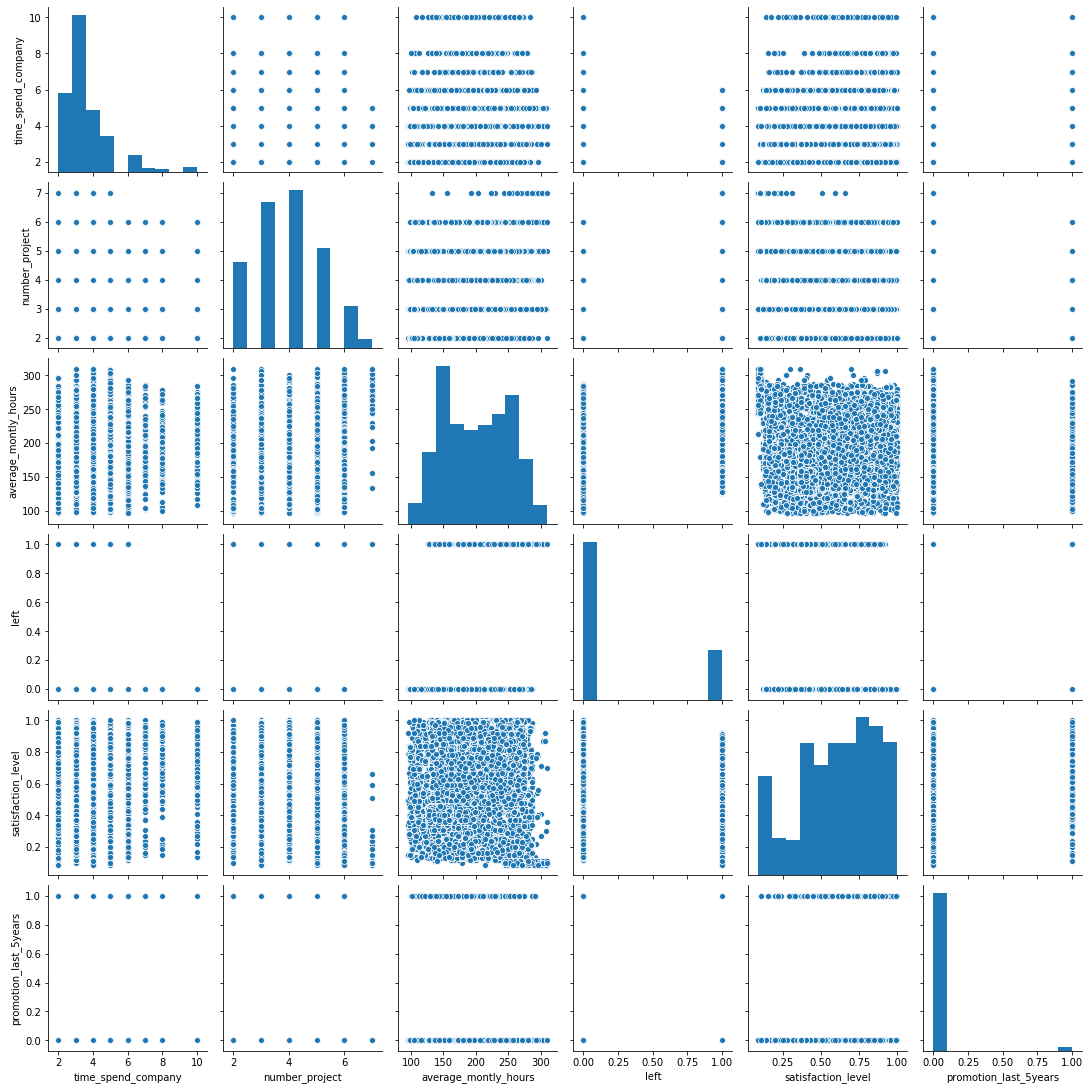

In [12]:
sns_plot = sns.pairplot(
    data[['time_spend_company', 'number_project', 'average_montly_hours', 'left', 'satisfaction_level', 'promotion_last_5years']])
sns_plot

Итак, мы видим, что уровень удовлетворенности седи тех, кто ушел, несколько ниже, чем среди тех, кто остался. И уровень удовлетворённости никак не зависит от того, повышали ли сотрудника за последние 5 лет.
На проекте 7 совсем нет строудников, работающих больше 5 лет. И на проекте 7 меньше всего уровень удовлетворённости.

С использованием t-test статистики проверим взаимосвязи между несколькими переменными.

Проверим связь уровня удовлетворённости и факта увольнения

In [20]:
left_n = data[data['left']==0]['satisfaction_level']

left_y = data[data['left']==1]['satisfaction_level']

print(stats.ttest_ind(left_n, left_y))

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)


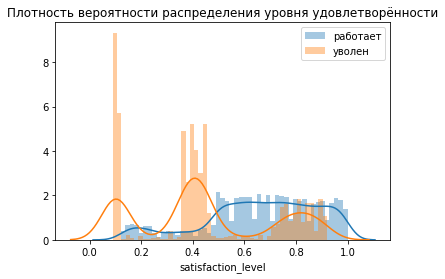

In [21]:
sns.distplot(left_n, 50)
sns.distplot(left_y, 50)
plt.title('Плотность вероятности распределения уровня удовлетворённости')
plt.legend(['работает', 'уволен'])
plt.show()

p-value равно 0.0, что намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между уровнем удовлетворённости работающих и уволенных.

Проверим связь среднего количества часов на работе и факта повышения за последние 5 лет

In [22]:
promo_n = data[data['promotion_last_5years']==0]['average_montly_hours']

promo_y = data[data['promotion_last_5years']==1]['average_montly_hours']

print(stats.ttest_ind(promo_n, promo_y))

Ttest_indResult(statistic=0.43405963706693557, pvalue=0.6642513790482909)


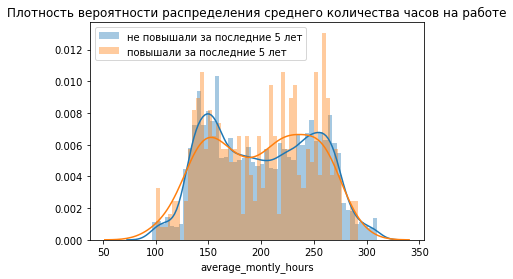

In [23]:
sns.distplot(promo_n, 50)
sns.distplot(promo_y, 50)
plt.title('Плотность вероятности распределения среднего количества часов на работе')
plt.legend(['не повышали за последние 5 лет', 'повышали за последние 5 лет'])
plt.show()

p-value равно 0.66, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистического различия между средним количеством часов на работе при наличии или отсутствии факта повышения за последние 5 лет.

Сколько работников работает в каждом департаменте:

In [67]:
projects = data[ (data['left']== 0)  ]
projects['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

распределение сотрудников по зарплатам

In [98]:
data.groupby('salary')[['salary']].count()

,salary
salary,
high,1237
low,7316
medium,6446


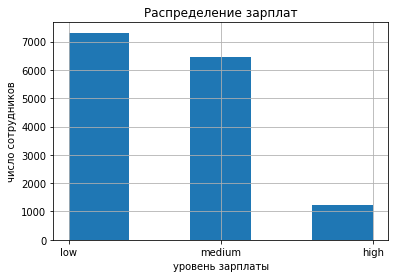

In [93]:
plt.hist(data['salary'], 5)
plt.xlabel('уровень зарплаты')
plt.ylabel('число сотрудников')
plt.title('Распределение зарплат')
plt.grid(True)

распределение сотрудников по зарплатам совместно с департаментами

In [5]:
data2 = data.pivot_table(index = 'salary', columns = 'sales',  values = 'Work_accident', aggfunc = 'count', 
                    fill_value = 0, margins = True)
data2.head()

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
salary,,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201,1237
low,609,364,358,335,180,402,451,2099,1146,1372,7316
medium,535,372,335,359,225,376,383,1772,942,1147,6446
All,1227,787,767,739,630,858,902,4140,2229,2720,14999


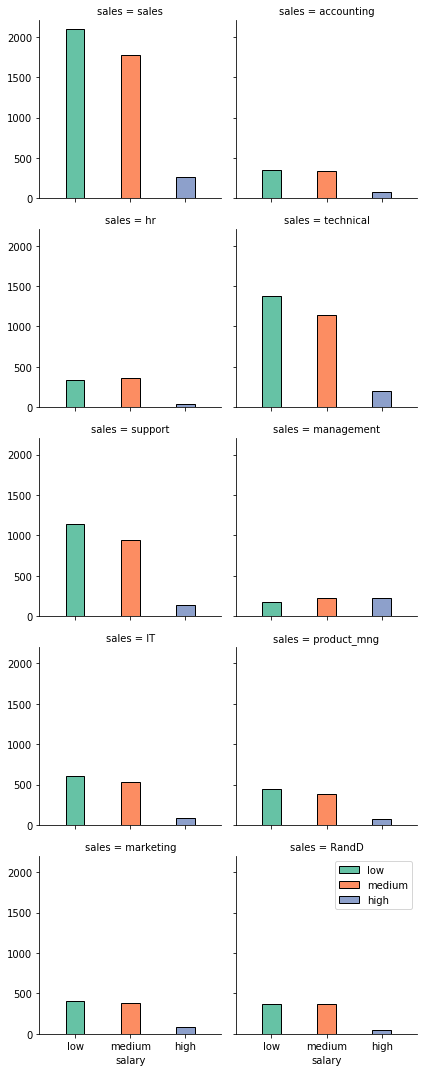

In [66]:
import seaborn as sns

bins = 3
g = sns.FacetGrid(data, col="sales", hue="salary", palette="Set2", col_wrap=2)
g.map(plt.hist, 'salary', bins=bins, ec="k")
plt.legend(['low', 'medium', 'high'])

plt.show()

Сколько сотрудников покинули компанию

In [42]:
projects = data.groupby(data['left'] == 1)['left'].sum()
print(str(sum(projects)) + ' сотрудников покинуло компанию')

3571 сотрудников покинуло компанию


Проверим несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [33]:
for each in data["salary"]:
    if each == "low":
        data["salary"] = 1
    elif each == "medium":
        data["salary"] = 2
    else:
        data["salary"] = 3
        

In [34]:
data["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [44]:
for each in data["sales"]:
    if each == "RandD":
        data["sales"] = 1
    elif each == "accounting":
        data["sales"] = 2
    elif each == "hr":
        data["sales"] = 3       
    elif each == "technical":
        data["sales"] = 4    
    elif each == "support":
        data["sales"] = 5        
    elif each == "management":
        data["sales"] = 6  
    elif each == "IT":
        data["sales"] = 7  
    elif each == "product_mng":
        data["sales"] = 8  
    elif each == "marketing":
        data["sales"] = 9  
    else:
        data["sales"] = 10

In [45]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,5,1
1,0.80,0.86,5,262,6,0,1,0,5,1
2,0.11,0.88,7,272,4,0,1,0,5,1
3,0.72,0.87,5,223,5,0,1,0,5,1
4,0.37,0.52,2,159,3,0,1,0,5,1


In [46]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(np_scaled)
data_norm.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0,-1.0,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0,-1.0,-1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0,-1.0,-1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0,-1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0,-1.0,-1.0


In [47]:
headers = list(data.columns.values)
data_norm.columns = headers
data_norm.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0,-1.0,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0,-1.0,-1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0,-1.0,-1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0,-1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0,-1.0,-1.0


In [48]:
output_y = data.loc[:, ['left']]
input_x = data.drop(data.columns[[6]], axis='columns')

In [50]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
Y=le.fit_transform(output_y)
Y=np.ravel(Y)

In [51]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

In [52]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier()

In [53]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3449
           1       1.00      0.98      0.99      1051

    accuracy                           1.00      4500
   macro avg       1.00      0.99      0.99      4500
weighted avg       1.00      1.00      1.00      4500



0.9951111111111111

No handles with labels found to put in legend.


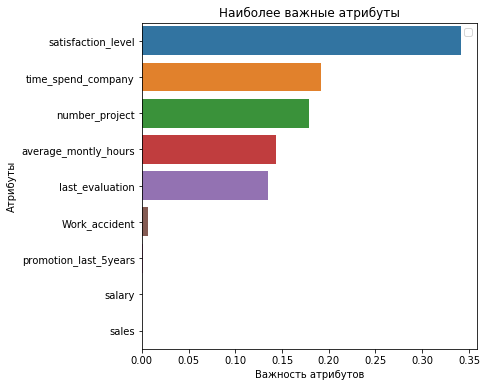

In [54]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Итак, больше всего на тот факт, что сотрудники покидают компанию, влияет уровень удовлетворённости.

Что интересно, уровень зарплат стоит на предпоследнем месте!!!

Проверим Ранговую корреляцию Спирмена между уровнем удовлетворённости фактом увольнения

In [29]:
from scipy.stats import spearmanr

In [69]:
stat, p = spearmanr(data['satisfaction_level'], data['left'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Переменные, вероятно, независимы')
else:
    print('Переменные, вероятно, зависимы')

stat=-0.366, p=0.000
Переменные, вероятно, зависимы 


Проверим Ранговую корреляцию Спирмена между фактом увольнения и номером проекта, а также между фактом увольнения и временем, проведённым в компании

In [70]:
stat, p = spearmanr(data['left'], data['number_project'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Переменные, вероятно, независимы')
else:
    print('Переменные, вероятно, зависимы')

stat=-0.020, p=0.017
Переменные, вероятно, зависимы 


In [71]:
stat, p = spearmanr(data['left'], data['time_spend_company'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Переменные, вероятно, независимы')
else:
    print('Переменные, вероятно, зависимы')

stat=0.269, p=0.000
Переменные, вероятно, зависимы 


Да, действительно, больше всего на факт увольнения влияет уровень удовлетворённости, номер проекта и время, проведённое в компании